In [1]:
# mouse blood scvelo
import scanpy
import scvelo as scv
import anndata

In [8]:
adata_filtered = scv.datasets.gastrulation_erythroid()

100%|████████████████████████████████████████| 463M/463M [01:23<00:00, 5.85MB/s]


In [12]:
adata_filtered.obs['stage'].drop_duplicates()

AAAGATCTCTCGAA     E7.5
AAACATACTACAGC    E7.75
ACACAGACCGCAAT     E7.0
AAACATTGTGCTCC     E8.0
AAACATTGGACGAG     E8.5
ATGTCGGATTTCAC    E7.25
AAACATTGGAGACG    E8.25
Name: stage, dtype: category
Categories (7, object): ['E7.0', 'E7.25', 'E7.5', 'E7.75', 'E8.0', 'E8.25', 'E8.5']

In [2]:
adata_paper =scanpy.read ('/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/gastrulation.h5ad')


In [13]:
adata_paper

AnnData object with n_obs × n_vars = 89267 × 53801
    obs: 'barcode', 'sample', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'umapX', 'umapY', 'haem_gephiX', 'haem_gephiY', 'haem_subclust', 'endo_gephiX', 'endo_gephiY', 'endo_trajectoryName', 'endo_trajectoryDPT', 'endo_gutX', 'endo_gutY', 'endo_gutDPT', 'endo_gutCluster', 'cell_velocyto_loom'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'

Please `pip install adjustText` for auto-aligning texts


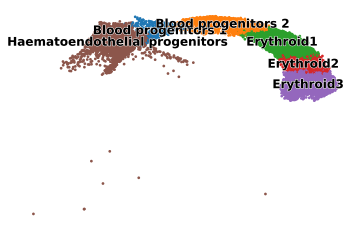

Filtered out 47193 genes that are detected 30 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:13) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [2]:
# gastrulation all data 

adata_paper =scanpy.read ('/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/gastrulation.h5ad')
adata_paper_bkup=adata_paper.copy()


# del 'Endothelium'(green)
stage_endo_blood={'E7.0', 'E7.25', 'E7.5', 'E8.25', 'E7.75', 'E8.5', 'E8.0'}
celltype_endo_blood={'Erythroid2', 'Blood progenitors 2', 'Erythroid3', 'Erythroid1', 'Blood progenitors 1',
                    'Haematoendothelial progenitors','Blood progenitors 1'}
adata_paper_endo_blood=adata_paper[adata_paper.obs.stage.isin(stage_endo_blood) & adata_paper.obs.celltype.isin(celltype_endo_blood),:].copy()
scv.pl.scatter(adata_paper_endo_blood, c='celltype', s=30, legend_align_text=True, legend_fontsize=12, title='')
scv.pp.filter_and_normalize(adata_paper_endo_blood, min_shared_counts=30, n_top_genes=2000)
scv.pp.moments(adata_paper_endo_blood,n_neighbors=100)


In [10]:
scv.tl.velocity(adata_paper_endo_blood, vkey='steady_state_velocity', mode='steady_state')
scv.tl.velocity_graph(adata_paper_endo_blood, vkey='steady_state_velocity')

# scv.tl.velocity(adata_paper_endo_blood, vkey='stochastic_velocity', mode='stochastic')
# scv.tl.velocity_graph(adata_paper_endo_blood, vkey='stochastic_velocity')

scv.tl.recover_dynamics(adata_paper_endo_blood,n_jobs=30)
scv.tl.velocity(adata_paper_endo_blood, mode='dynamical', vkey='dynamical_velocity')
scv.tl.velocity_graph(adata_paper_endo_blood, vkey='dynamical_velocity', variance_stabilization=True,n_jobs=30)
# scv.pl.velocity_embedding_stream(adata_paper_endo_blood, vkey='dynamical_velocity')
# scv.pl.velocity_embedding(adata_paper_endo_blood, vkey='dynamical_velocity', scale=.7, dpi=200)


computing velocities
    finished (0:00:01) --> added 
    'steady_state_velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/48 cores)
    finished (0:01:26) --> added 
    'steady_state_velocity_graph', sparse matrix with cosine correlations (adata.uns)
recovering dynamics (using 30/48 cores)
    finished (0:02:11) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:32) --> added 
    'dynamical_velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 30/48 cores)
    finished (0:00:40) --> added 
    'dynamical_velocity_graph', sparse matrix with cosine correlations (adata.uns)


saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/umap_static.pdf


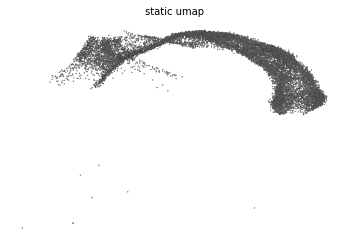

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/umap_dynamic.pdf


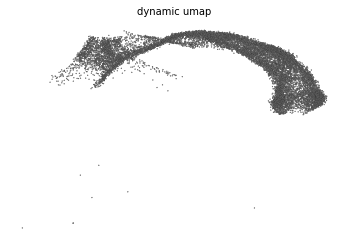

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Sox17_static.pdf


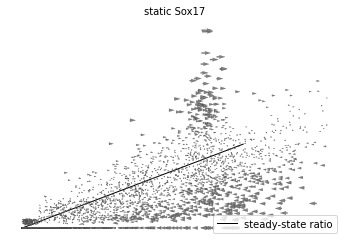

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Sox17_dynamic.pdf


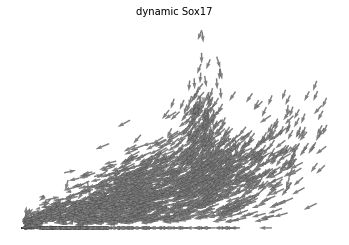

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/2410006H16Rik_static.pdf


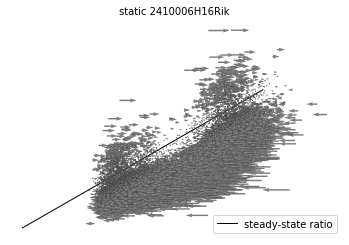

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/2410006H16Rik_dynamic.pdf


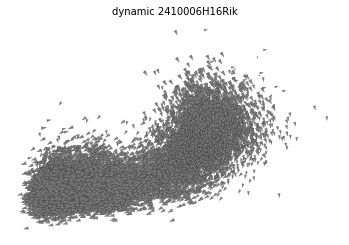

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Smim1_static.pdf


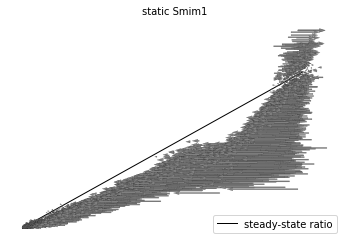

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Smim1_dynamic.pdf


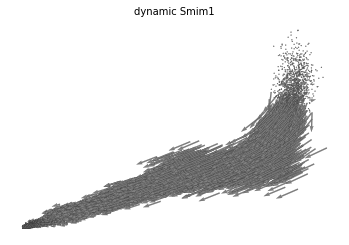

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Hba-x_static.pdf


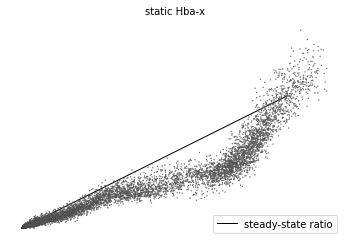

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Hba-x_dynamic.pdf


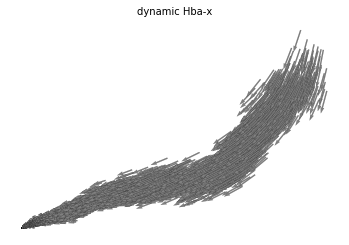

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Abi3_static.pdf


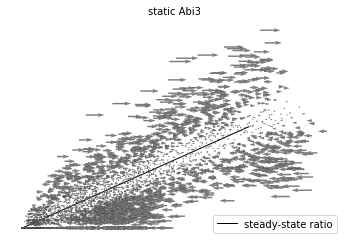

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Abi3_dynamic.pdf


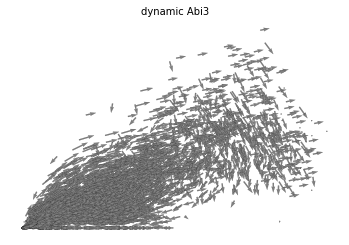

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Akap12_static.pdf


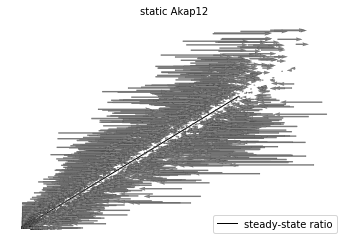

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Akap12_dynamic.pdf


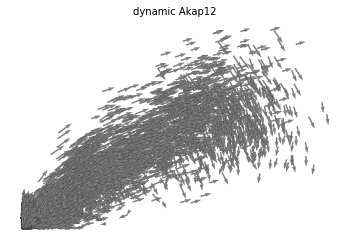

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Car4_static.pdf


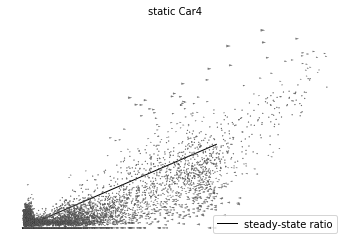

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Car4_dynamic.pdf


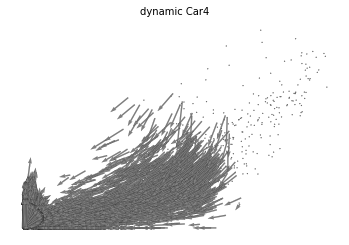

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Degs1_static.pdf


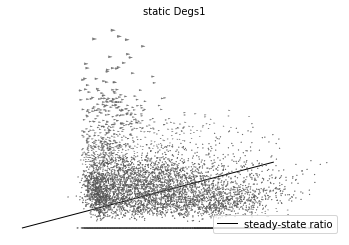

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Degs1_dynamic.pdf


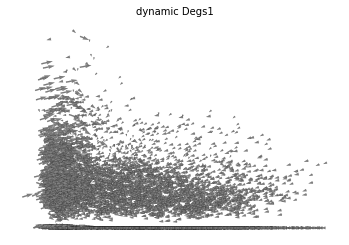

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Dhrs11_static.pdf


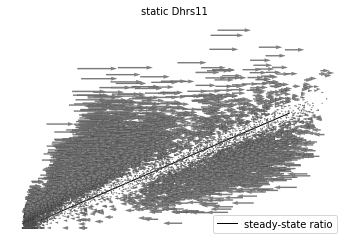

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Dhrs11_dynamic.pdf


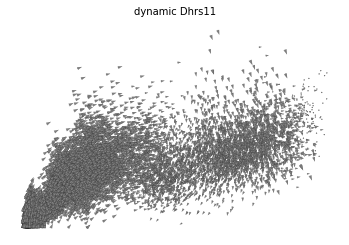

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Fn1_static.pdf


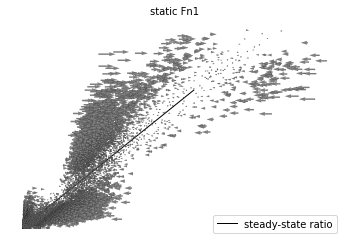

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Fn1_dynamic.pdf


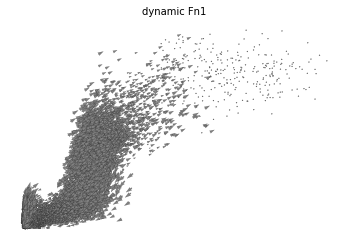

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Grb10_static.pdf


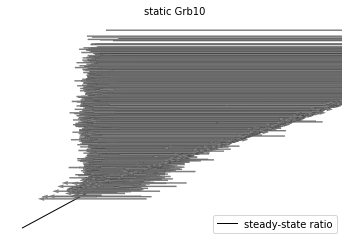

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Grb10_dynamic.pdf


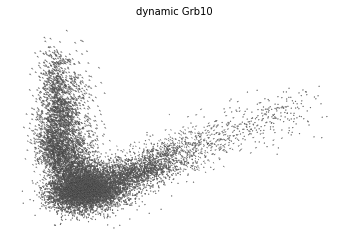

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/H2afv_static.pdf


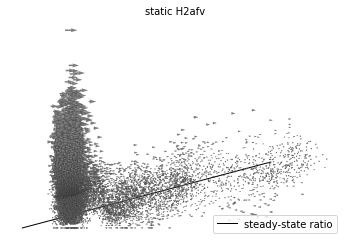

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/H2afv_dynamic.pdf


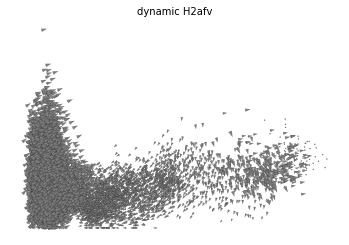

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Hba-a1_static.pdf


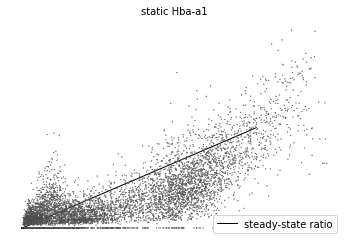

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Hba-a1_dynamic.pdf


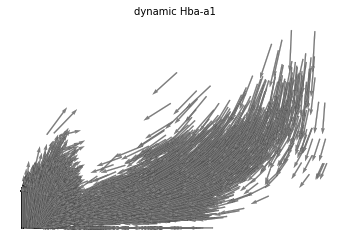

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Hba-x_static.pdf


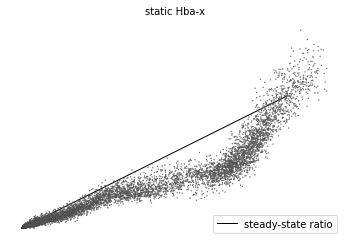

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Hba-x_dynamic.pdf


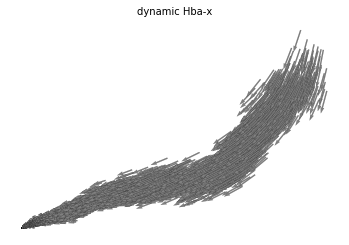

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Hspd1_static.pdf


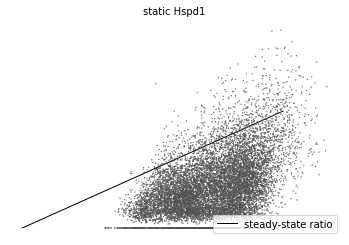

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Hspd1_dynamic.pdf


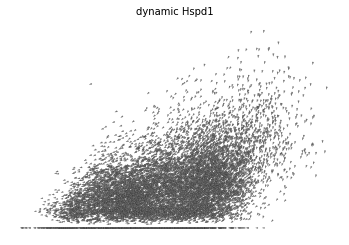

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Hspe1_static.pdf


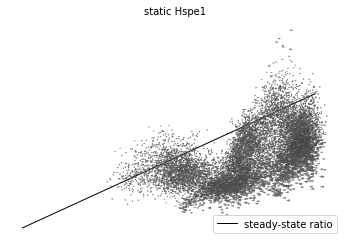

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Hspe1_dynamic.pdf


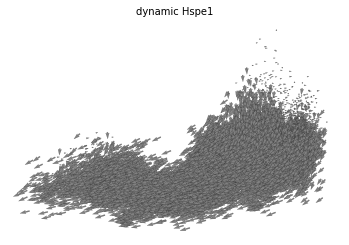

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Igf1_static.pdf


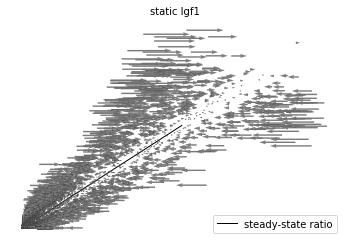

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Igf1_dynamic.pdf


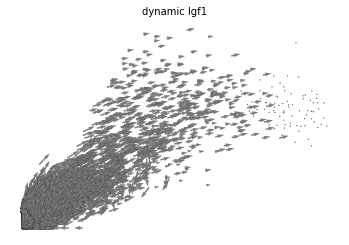

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Igf2bp1_static.pdf


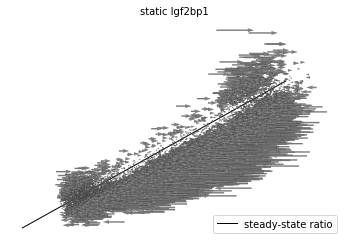

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Igf2bp1_dynamic.pdf


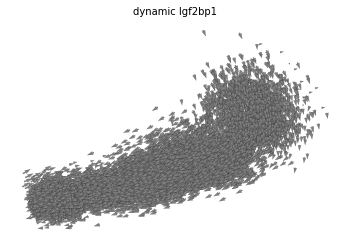

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Klf7_static.pdf


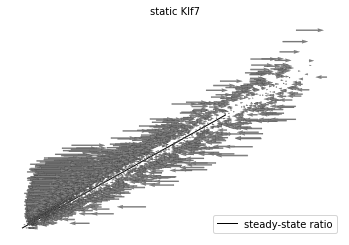

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Klf7_dynamic.pdf


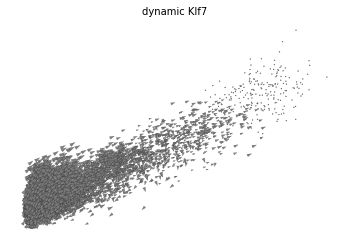

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Sgk3_static.pdf


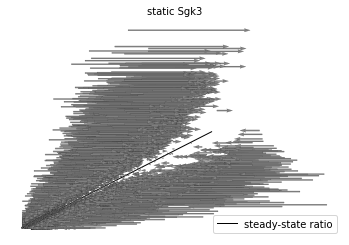

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Sgk3_dynamic.pdf


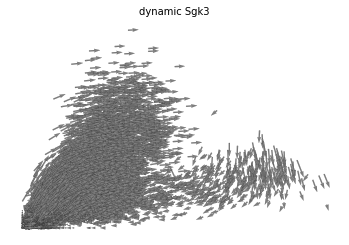

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Slc4a1_static.pdf


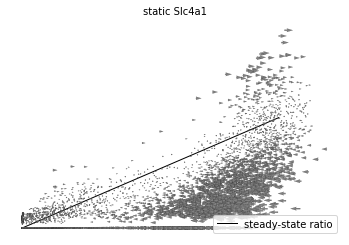

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Slc4a1_dynamic.pdf


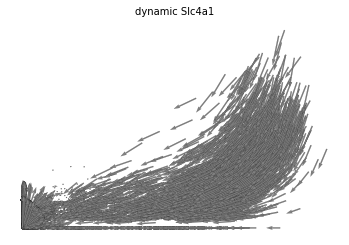

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Tagln2_static.pdf


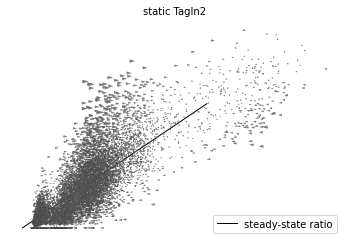

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Tagln2_dynamic.pdf


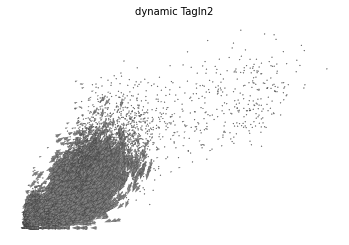

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Timp3_static.pdf


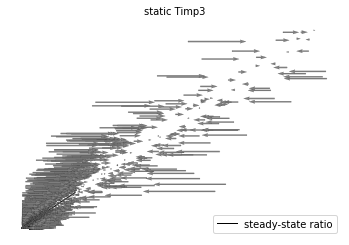

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Timp3_dynamic.pdf


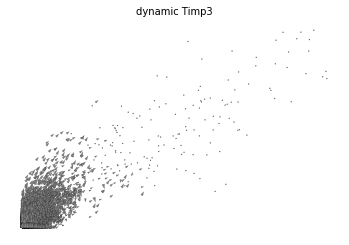

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Tns3_static.pdf


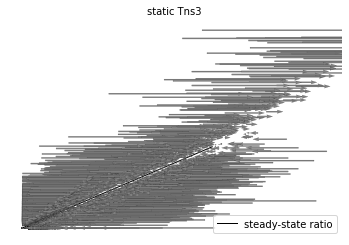

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Tns3_dynamic.pdf


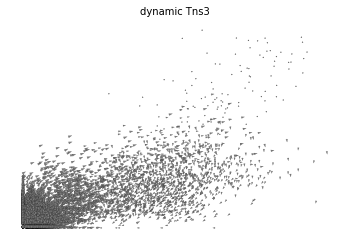

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Tpd52l1_static.pdf


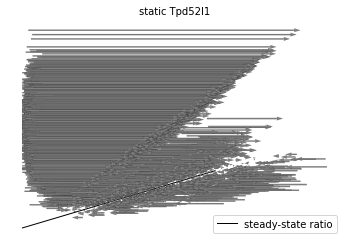

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Tpd52l1_dynamic.pdf


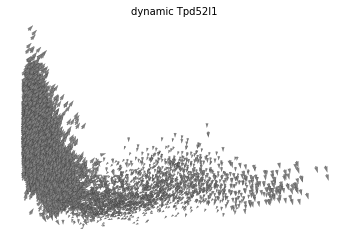

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Ube2d1_static.pdf


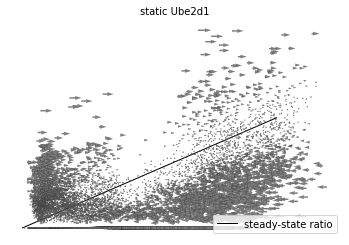

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Ube2d1_dynamic.pdf


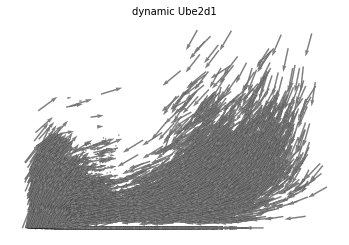

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Ugp2_static.pdf


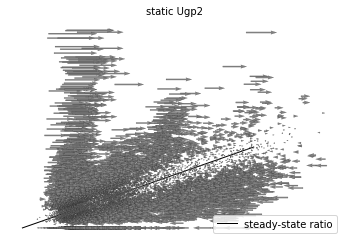

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/Ugp2_dynamic.pdf


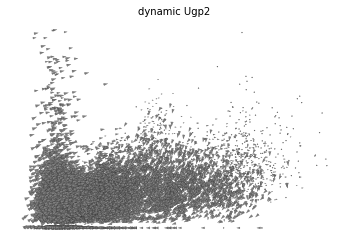

In [12]:
gene_list_full=['umap','Sox17', '2410006H16Rik', 'Smim1', 'Hba-x', 'Abi3', 'Akap12', 'Car4', 'Degs1','Dhrs11','Fn1','Grb10','H2afv','Hba-a1','Hba-x','Hspd1','Hspe1','Igf1','Igf2bp1','Klf7','Sgk3','Slc4a1','Tagln2','Timp3','Tns3','Tpd52l1','Ube2d1','Ugp2']
save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/scvelo/sample_gene/'
for gene in gene_list_full:
    scv.pl.velocity_embedding(adata_paper_endo_blood, vkey='steady_state_velocity', basis=gene,
                              scale=.6, width=.0035, frameon=False, title='static_'+gene,save=save_path+gene+'_static.pdf')
    scv.pl.velocity_embedding(adata_paper_endo_blood, vkey='dynamical_velocity', basis=gene, scale=4, width=.0035,
                             frameon=False, title='dynamic_'+gene, save=save_path+gene+'_dynamic.pdf')
